## Tarea 2 - Métodos de Aprendizajes de Máquinas en Data Science

### Integrantes: Sofía Álvarez, Sebastián Dinator.

In [24]:
# Importando librerías
import pandas as pd
import numpy as np
from sympy import Matrix
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Graficos
from plotnine import ggplot
from plotnine import *

In [25]:
# Generales
import pandas as pd
import numpy as np
from sympy import Matrix
from plotnine import *

# Imagen
from IPython.display import Image

# Gráficos 
import seaborn as sns
import matplotlib.pyplot as plt

# k-fold cross validation
from sklearn.model_selection import KFold

# Muestreo
from sklearn.model_selection import train_test_split

# Regresión Logística

from sklearn.linear_model import LogisticRegression

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Arbol de desicion
from sklearn.tree import DecisionTreeClassifier

# Medidad de tendencia central
import statistics


from sklearn.neighbors import KNeighborsClassifier

# OTROS(?)
import statsmodels.api as sm 
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score)

In [26]:
# Importando la data
df = pd.read_csv("trainData.csv")
df

,Unnamed: 0,date,fligth_number,origin,destination,distance,noshow,denied_boarding,pax_midlow,pax_high,...,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,departure_time,capacity,revenues_usd,bookings
0,389083,2009-11-09,8995,BBA,SCL,1394,9.0,0,94,2,...,22,19,0,1,0,239,10:30:00,174.0,10631.1,240
1,177073,2009-05-23,7061,LIM,TRU,489,0.0,0,100,4,...,25,0,0,19,9,192,19:20:00,174.0,5453.7,220
2,1040357,2011-05-09,8972,SCL,PUQ,2180,4.0,0,7,1,...,2,0,0,0,10,69,09:54:00,218.0,16161.0,79
3,505258,2010-02-12,6039,CGH,CNF,524,13.0,0,54,4,...,4,0,0,26,0,64,21:00:00,174.0,10828.7,90
4,369663,2009-10-24,7713,GPS,GYE,1170,14.0,0,21,88,...,0,88,1,23,3,183,12:40:00,144.0,16721.6,209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999885,359783,2009-10-16,6024,UDI,CGH,552,5.0,0,25,12,...,12,0,0,64,9,0,15:14:00,144.0,14102.1,73
999886,152315,2009-05-03,6669,LIM,HAV,3934,4.0,0,129,3,...,2,20,0,0,118,156,08:50:00,168.0,32907.8,274
999887,1000747,2011-04-04,9094,IQQ,SCL,1430,5.0,0,2,1,...,20,36,0,7,0,124,14:18:00,218.0,13519.3,131
999888,117952,2009-04-04,7704,GYE,SCY,1091,2.0,0,67,2,...,16,0,0,34,2,98,08:05:00,144.0,8729.6,134


# Limpieza y selección de variables

## Analizando la prescencia de nulos

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999890 entries, 0 to 999889
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       999890 non-null  int64  
 1   date             999890 non-null  object 
 2   fligth_number    999890 non-null  int64  
 3   origin           999890 non-null  object 
 4   destination      999890 non-null  object 
 5   distance         999890 non-null  int64  
 6   noshow           999890 non-null  float64
 7   denied_boarding  999890 non-null  int64  
 8   pax_midlow       999890 non-null  int64  
 9   pax_high         999890 non-null  int64  
 10  pax_midhigh      999890 non-null  int64  
 11  pax_low          999890 non-null  int64  
 12  pax_freqflyer    999890 non-null  int64  
 13  group_bookings   999890 non-null  int64  
 14  out_of_stock     999890 non-null  int64  
 15  dom_cnx          999890 non-null  int64  
 16  int_cnx          999890 non-null  int6

In [28]:
#date
#origin
#destination
#departure time


df = df.drop(['date', 'origin', 'destination', 'departure_time'], axis = 1)
df
df = df.dropna() # Eliminamos datos nulos.
df = df.reset_index()
#df = df.drop(['level_0', 'index'], axis = 1)
df.shape
display(df)

,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings
0,0,389083,8995,1394,9.0,0,94,2,28,94,22,19,0,1,0,239,174.0,10631.1,240
1,1,177073,7061,489,0.0,0,100,4,4,87,25,0,0,19,9,192,174.0,5453.7,220
2,2,1040357,8972,2180,4.0,0,7,1,5,64,2,0,0,0,10,69,218.0,16161.0,79
3,3,505258,6039,524,13.0,0,54,4,7,21,4,0,0,26,0,64,174.0,10828.7,90
4,4,369663,7713,1170,14.0,0,21,88,18,82,0,88,1,23,3,183,144.0,16721.6,209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999885,999885,359783,6024,552,5.0,0,25,12,20,4,12,0,0,64,9,0,144.0,14102.1,73
999886,999886,152315,6669,3934,4.0,0,129,3,19,121,2,20,0,0,118,156,168.0,32907.8,274
999887,999887,1000747,9094,1430,5.0,0,2,1,0,108,20,36,0,7,0,124,218.0,13519.3,131
999888,999888,117952,7704,1091,2.0,0,67,2,7,42,16,0,0,34,2,98,144.0,8729.6,134


In [29]:
for columna in df.columns:
    if type(df[columna][0]) != str:
        print(columna.upper())
        print(len(df[columna].unique()))
        display(df[df[columna]%1 != 0])

INDEX
999890


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings


UNNAMED: 0
999890


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings


FLIGTH_NUMBER
4026


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings


DISTANCE
754


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings


NOSHOW
115


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings


DENIED_BOARDING
35


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings


PAX_MIDLOW
322


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings


PAX_HIGH
154


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings


PAX_MIDHIGH
158


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings


PAX_LOW
278


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings


PAX_FREQFLYER
214


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings


GROUP_BOOKINGS
209


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings


OUT_OF_STOCK
2


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings


DOM_CNX
220


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings


INT_CNX
333


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings


P2P
422


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings


CAPACITY
232


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings
1047,1047,437541,5420,590,12.0,0,83,3,6,54,18,0,0,85,2,77,174.294915,11662.4,164
4698,4698,439135,6076,1182,5.0,0,110,5,9,89,13,0,0,13,26,187,173.705584,14245.5,226
13695,13695,447967,5589,1607,6.0,0,86,0,0,76,20,0,0,13,0,169,174.108276,8832.6,182
22619,22619,443874,5792,657,4.0,0,46,3,11,33,42,0,1,60,0,75,174.264840,6922.3,135
27762,27762,440030,5408,590,6.0,0,84,0,0,53,24,1,0,10,5,146,144.244068,7185.6,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952284,952284,454335,5844,2446,18.0,0,59,0,9,34,26,0,0,2,1,125,174.142273,21221.3,128
958702,958702,454360,5916,590,3.0,0,88,0,2,63,10,0,0,57,0,106,174.294915,7709.7,163
959324,959324,439988,6079,1182,2.0,0,108,0,2,95,15,0,0,15,9,196,173.705584,14357.0,220
965548,965548,438992,6079,1182,36.0,0,60,0,0,43,14,0,0,12,3,102,173.705584,7842.8,117


REVENUES_USD
310851


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings
0,0,389083,8995,1394,9.0,0,94,2,28,94,22,19,0,1,0,239,174.0,10631.1,240
1,1,177073,7061,489,0.0,0,100,4,4,87,25,0,0,19,9,192,174.0,5453.7,220
3,3,505258,6039,524,13.0,0,54,4,7,21,4,0,0,26,0,64,174.0,10828.7,90
4,4,369663,7713,1170,14.0,0,21,88,18,82,0,88,1,23,3,183,144.0,16721.6,209
5,5,251495,8734,5861,6.0,0,188,4,2,85,20,0,0,0,99,200,279.0,81609.3,299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999884,999884,122579,8878,1430,3.0,0,86,7,51,80,8,39,0,104,5,123,218.0,14169.6,232
999885,999885,359783,6024,552,5.0,0,25,12,20,4,12,0,0,64,9,0,144.0,14102.1,73
999886,999886,152315,6669,3934,4.0,0,129,3,19,121,2,20,0,0,118,156,168.0,32907.8,274
999887,999887,1000747,9094,1430,5.0,0,2,1,0,108,20,36,0,7,0,124,218.0,13519.3,131


BOOKINGS
581


,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings


In [30]:
df['capacity'].describe()

count    999890.000000
mean        178.056881
std          32.694811
min          53.000000
25%         150.000000
50%         174.000000
75%         174.000000
max         451.000000
Name: capacity, dtype: float64

In [31]:
eliminar = list(df[df['capacity'] % 1 != 0].index)
data = df.drop(eliminar,axis=0)
data = data.reset_index()
data

,level_0,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings
0,0,0,389083,8995,1394,9.0,0,94,2,28,94,22,19,0,1,0,239,174.0,10631.1,240
1,1,1,177073,7061,489,0.0,0,100,4,4,87,25,0,0,19,9,192,174.0,5453.7,220
2,2,2,1040357,8972,2180,4.0,0,7,1,5,64,2,0,0,0,10,69,218.0,16161.0,79
3,3,3,505258,6039,524,13.0,0,54,4,7,21,4,0,0,26,0,64,174.0,10828.7,90
4,4,4,369663,7713,1170,14.0,0,21,88,18,82,0,88,1,23,3,183,144.0,16721.6,209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999713,999885,999885,359783,6024,552,5.0,0,25,12,20,4,12,0,0,64,9,0,144.0,14102.1,73
999714,999886,999886,152315,6669,3934,4.0,0,129,3,19,121,2,20,0,0,118,156,168.0,32907.8,274
999715,999887,999887,1000747,9094,1430,5.0,0,2,1,0,108,20,36,0,7,0,124,218.0,13519.3,131
999716,999888,999888,117952,7704,1091,2.0,0,67,2,7,42,16,0,0,34,2,98,144.0,8729.6,134


In [32]:
display(data.describe())
print(data.describe().shape)

,level_0,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings
count,999718.000000,999718.000000,9.997180e+05,999718.000000,999718.000000,999718.000000,999718.000000,999718.000000,999718.000000,999718.000000,999718.000000,999718.000000,999718.000000,999718.000000,999718.000000,999718.000000,999718.000000,999718.000000,999718.000000,999718.000000
mean,499947.870237,499947.870237,6.437456e+05,6109.117706,1460.855778,6.015700,0.047570,75.510574,3.807903,6.319279,57.197498,16.798840,3.829329,0.096225,25.840142,26.708132,107.085820,178.056066,14835.277687,159.634094
std,288642.978213,288642.978213,3.882671e+05,2050.918123,1684.637100,5.112556,0.547211,44.570278,7.251763,10.266169,38.398518,13.836479,12.299626,0.294900,32.263478,43.961292,65.524338,32.696178,17963.999498,68.630524
min,0.000000,0.000000,0.000000e+00,10.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,-77206.900000,1.000000
25%,249978.250000,249978.250000,3.116202e+05,5380.000000,538.000000,3.000000,0.000000,46.000000,0.000000,0.000000,29.000000,7.000000,0.000000,0.000000,0.000000,0.000000,59.000000,150.000000,6286.200000,110.000000
50%,499950.500000,499950.500000,6.242615e+05,6036.000000,916.000000,5.000000,0.000000,77.000000,1.000000,3.000000,55.000000,14.000000,0.000000,0.000000,12.000000,5.000000,99.000000,174.000000,9692.200000,151.000000
75%,749916.750000,749916.750000,9.457720e+05,7190.000000,1672.000000,8.000000,0.000000,104.000000,4.000000,8.000000,82.000000,23.000000,0.000000,0.000000,42.000000,31.000000,147.000000,174.000000,15730.900000,200.000000
max,999889.000000,999889.000000,1.350331e+06,9264.000000,11380.000000,271.000000,53.000000,344.000000,195.000000,230.000000,296.000000,236.000000,240.000000,1.000000,262.000000,357.000000,564.000000,451.000000,335775.400000,608.000000


(8, 20)


sí
fligth_number
noshow
denied_boarding
dom
int_cnx
p2p
capacity
bookings


No
distance porque 2 podrian tener la misma
rebenues


analizar
pax
out of stock

In [33]:
#### Anlizando si 
#* pax_high
#* pax_midhigh
#* pax_midlow
#* pax_low
#* pax_freqflyer
#### están contenidas en bookings
datAnalisis1 = data[["Unnamed: 0","bookings"]]
datAnalisis1["suma"] = data["pax_high"] + data["pax_midhigh"] + data["pax_midlow"] + data["pax_low"] + data["pax_freqflyer"]

count = 0
for i in range(data.shape[0]):
    if (datAnalisis1["bookings"].iloc[i] != datAnalisis1["suma"].iloc[i]):
        print(datAnalisis1["bookings"].iloc[i])
    else: 
        count += 1
        
print("Hay:", count, "coincidencias", "de un total de", datAnalisis1.shape[0], "datos")

#### Conclusión: bookings contiene a esas variables.

C:\Users\sebad\AppData\Local\Temp\ipykernel_70472\3989490445.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Hay: 999718 coincidencias de un total de 999718 datos


In [34]:
#### Para optimizar el número de variables se unen los 2 pax_high y 2 pax_low
data['paxH'] = (data['pax_high'] + data['pax_midhigh'])
data['paxL'] = (data['pax_low'] + data['pax_midlow'])
data

,level_0,index,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,...,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings,paxH,paxL
0,0,0,389083,8995,1394,9.0,0,94,2,28,...,19,0,1,0,239,174.0,10631.1,240,30,188
1,1,1,177073,7061,489,0.0,0,100,4,4,...,0,0,19,9,192,174.0,5453.7,220,8,187
2,2,2,1040357,8972,2180,4.0,0,7,1,5,...,0,0,0,10,69,218.0,16161.0,79,6,71
3,3,3,505258,6039,524,13.0,0,54,4,7,...,0,0,26,0,64,174.0,10828.7,90,11,75
4,4,4,369663,7713,1170,14.0,0,21,88,18,...,88,1,23,3,183,144.0,16721.6,209,106,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999713,999885,999885,359783,6024,552,5.0,0,25,12,20,...,0,0,64,9,0,144.0,14102.1,73,32,29
999714,999886,999886,152315,6669,3934,4.0,0,129,3,19,...,20,0,0,118,156,168.0,32907.8,274,22,250
999715,999887,999887,1000747,9094,1430,5.0,0,2,1,0,...,36,0,7,0,124,218.0,13519.3,131,1,110
999716,999888,999888,117952,7704,1091,2.0,0,67,2,7,...,0,0,34,2,98,144.0,8729.6,134,9,109


In [35]:
######## Anlizando la cantidad de vuelos que denegó abordajes.
data.loc[data.denied_boarding >= 1, 'sum_denied'] = 1
data.loc[data.denied_boarding < 1, 'sum_denied'] = 0
print(data['sum_denied'].sum(), 'vuelos')

13779.0 vuelos


In [36]:
######## Anlizando la cantidad de vuelos que denegó abordajes.
data.loc[data.out_of_stock >= 1, 'sum_out_stock'] = 1
data.loc[data.denied_boarding < 1, 'sum_out_stock'] = 0
print(data['sum_out_stock'].sum(), 'vuelos')

4440.0 vuelos


In [37]:
######## Anlizando la cantidad de vuelos que denegó abordajes.
data.loc[data.noshow >= 1, 'sum_noshow'] = 1
data.loc[data.noshow < 1, 'sum_noshow'] = 0
print(data['sum_noshow'].sum(), 'vuelos')

928632.0 vuelos


In [38]:
dataUsar = data[['fligth_number',
                 'dom_cnx', 'int_cnx', 'p2p', 'capacity',
                 'bookings', 'paxL', 'paxH',
                 'pax_freqflyer', 'group_bookings']]
dataUsar

,fligth_number,dom_cnx,int_cnx,p2p,capacity,bookings,paxL,paxH,pax_freqflyer,group_bookings
0,8995,1,0,239,174.0,240,188,30,22,19
1,7061,19,9,192,174.0,220,187,8,25,0
2,8972,0,10,69,218.0,79,71,6,2,0
3,6039,26,0,64,174.0,90,75,11,4,0
4,7713,23,3,183,144.0,209,103,106,0,88
...,...,...,...,...,...,...,...,...,...,...
999713,6024,64,9,0,144.0,73,29,32,12,0
999714,6669,0,118,156,168.0,274,250,22,2,20
999715,9094,7,0,124,218.0,131,110,1,20,36
999716,7704,34,2,98,144.0,134,109,9,16,0


In [39]:
scaler = StandardScaler()
scaler.fit(dataUsar)

data_estandar = pd.DataFrame(scaler.transform(dataUsar), columns=dataUsar.columns)
data_estandar['noshow'] = data['noshow']
data_estandar

,fligth_number,dom_cnx,int_cnx,p2p,capacity,bookings,paxL,paxH,pax_freqflyer,group_bookings,noshow
0,1.407118,-0.769916,-0.607538,2.013210,-0.124053,1.170994,0.830775,1.398776,0.375902,1.233426,9.0
1,0.464125,-0.212009,-0.402812,1.295919,-0.124053,0.879579,0.815749,-0.149725,0.592720,-0.311337,0.0
2,1.395903,-0.800910,-0.380065,-0.581247,1.221670,-1.174902,-0.927179,-0.290497,-1.069553,-0.311337,4.0
3,-0.034188,0.004955,-0.607538,-0.657555,-0.124053,-1.014623,-0.867078,0.061435,-0.925007,-0.311337,13.0
4,0.782032,-0.088030,-0.539296,1.158565,-1.041592,0.719300,-0.446371,6.748140,-1.214098,6.843356,14.0
...,...,...,...,...,...,...,...,...,...,...,...
999713,-0.041502,1.182758,-0.402812,-1.634292,-1.041592,-1.262327,-1.558239,1.539548,-0.346825,-0.311337,5.0
999714,0.272991,-0.800910,2.076643,0.746504,-0.307561,1.666401,1.762340,0.835685,-1.069553,1.314729,4.0
999715,1.455389,-0.583947,-0.607538,0.258136,1.221670,-0.417221,-0.341194,-0.642429,0.231357,2.615583,5.0
999716,0.777643,0.252913,-0.562043,-0.138663,-1.041592,-0.373509,-0.356220,-0.079338,-0.057734,-0.311337,2.0


In [40]:
def calculate_sMAPE(actual, predicted): 
    flag = []
    
    for a,p in zip(actual, predicted):
        
        if a == 0 and p == 0:
            flag.append(0)
            
        else:
            flag.append(np.abs(a - p) / (np.abs(a) + np.abs(p)))
            
            
    return  round(np.mean(flag)*100, 4), round(np.std(flag), 4)
  

In [41]:
NN = 5
kf = KFold(n_splits=10,shuffle=False)
print(kf)
#Generando los k-fold
temp = kf.split(data_estandar)
count = 1

means = []
stds = []

for train_index, test_index in temp:
    
    print('')
    print('ITERACIÓN', count)
    
    
    lista_train_index = list(train_index)
    lista_test_index = list(test_index)
    
    X_train = data_estandar.iloc[lista_train_index,0:-1]
    y_train = data_estandar.iloc[lista_train_index,-1]
    
    X_test = data_estandar.iloc[lista_test_index,0:-1]
    y_test = np.array(data_estandar.iloc[lista_test_index, -1])
    
    
    KNN = KNeighborsClassifier(n_neighbors = NN, weights="uniform", n_jobs = -1)

    KNN=KNN.fit(X_train,y_train)
    
    
    #Aplicando el modelo a otros datos
    resultado = KNN.predict(X_test)
    print("Resultado de la predicción:",resultado)
    print("Resultado original        :",y_test)
    
        
    mean, std = calculate_sMAPE(resultado, y_test)

    
    print(f'Error {count}: {mean} +- {std}')

    count += 1

    
    means.append(mean)
    stds.append(std)

    
print(f'vecinos = {NN}, error =  {round(np.mean(means), 2)} +- {round(np.mean(stds), 2)} ')



KFold(n_splits=10, random_state=None, shuffle=False)

ITERACIÓN 1
Resultado de la predicción: [ 0. 10.  1. ...  2.  1.  2.]
Resultado original        : [9. 0. 4. ... 5. 3. 5.]
Error 1: 49.1951 +- 0.3394

ITERACIÓN 2
Resultado de la predicción: [0. 2. 2. ... 1. 5. 5.]
Resultado original        : [ 4.  2. 11. ...  0.  4.  6.]
Error 2: 49.0953 +- 0.3382

ITERACIÓN 3
Resultado de la predicción: [1. 0. 6. ... 3. 4. 4.]
Resultado original        : [ 6. 17.  9. ...  7.  3.  1.]
Error 3: 49.0843 +- 0.3385

ITERACIÓN 4
Resultado de la predicción: [2. 3. 0. ... 0. 2. 1.]
Resultado original        : [ 4.  6. 12. ... 16. 13.  3.]
Error 4: 49.0 +- 0.3386

ITERACIÓN 5
Resultado de la predicción: [ 1. 11.  3. ...  3.  5.  9.]
Resultado original        : [ 5. 10.  6. ...  5.  6.  8.]
Error 5: 48.984 +- 0.339

ITERACIÓN 6
Resultado de la predicción: [5. 2. 0. ... 8. 0. 5.]
Resultado original        : [ 7. 11.  5. ...  2.  6.  5.]
Error 6: 49.2022 +- 0.3387

ITERACIÓN 7
Resultado de la predicción: [4. 0

In [42]:

kf = KFold(n_splits=10,shuffle=False)
print(kf)
#Generando los k-fold
temp = kf.split(dataUsar)
count = 1

for train_index, test_index in temp:
    
    print('')
    print('ITERACIÓN', count)
    
    
    lista_train_index = list(train_index)
    lista_test_index = list(test_index)
    
    X_train = dataUsar.iloc[lista_train_index,:-1]
    y_train = dataUsar.iloc[lista_train_index,-1]
    
    X_test = dataUsar.iloc[lista_test_index,:-1]
    y_test = np.array(dataUsar.iloc[lista_test_index,-1])
    
    
    KNN = KNeighborsClassifier(n_neighbors=3,weights="uniform",n_jobs=-1)

    KNN=KNN.fit(X_train,y_train)
    
    
    #Aplicando el modelo a otros datos
    resultado = KNN.predict(X_test)
    print("Resultado de la predicción:",resultado)
    print("Resultado original        :",y_test)
    
        
    mean, std = calculate_sMAPE(resultado, y_test)

    
    print(f'Error {count}: {mean} +- {std}')

    count += 1



KFold(n_splits=10, random_state=None, shuffle=False)

ITERACIÓN 1
Resultado de la predicción: [0 0 0 ... 0 0 0]
Resultado original        : [19  0  0 ...  0  4  0]
Error 1: 16.0374 +- 0.3606

ITERACIÓN 2
Resultado de la predicción: [ 0  0  0 ... 39  0  0]
Resultado original        : [21 54  7 ... 51  0  0]
Error 2: 16.21 +- 0.3624

ITERACIÓN 3
Resultado de la predicción: [0 0 0 ... 0 0 0]
Resultado original        : [ 0 10  0 ...  0  0 21]
Error 3: 15.9651 +- 0.3603

ITERACIÓN 4
Resultado de la predicción: [0 0 0 ... 0 0 0]
Resultado original        : [ 0  0  0 ...  0  0 23]
Error 4: 16.349 +- 0.3637

ITERACIÓN 5
Resultado de la predicción: [0 0 0 ... 0 0 0]
Resultado original        : [6 0 0 ... 0 0 0]
Error 5: 16.1702 +- 0.3621

ITERACIÓN 6
Resultado de la predicción: [0 0 0 ... 0 0 0]
Resultado original        : [ 0  0 24 ...  0  0  0]
Error 6: 16.1542 +- 0.3618

ITERACIÓN 7
Resultado de la predicción: [0 0 0 ... 0 0 0]
Resultado original        : [ 0  0  0 ... 16  0  0]
Error 7: 16

In [43]:
NN = 5

kf = KFold(n_splits=10,shuffle=False)
print(kf)
#Generando los k-fold
temp = kf.split(dataUsar)
count = 1

means = []
stds = []

for train_index, test_index in temp:
    
    
    print('')
    print('ITERACIÓN', count)
    
    
    lista_train_index = list(train_index)
    lista_test_index = list(test_index)
    
    X_train = dataUsar.iloc[lista_train_index,:-1]
    y_train = dataUsar.iloc[lista_train_index,-1]
    
    X_test = dataUsar.iloc[lista_test_index,:-1]
    y_test = np.array(dataUsar.iloc[lista_test_index,-1])
    
    
    KNN = KNeighborsClassifier(n_neighbors = NN,weights="uniform",n_jobs=-1)

    KNN=KNN.fit(X_train,y_train)
    
    
    #Aplicando el modelo a otros datos
    
    resultado = KNN.predict(X_test)
    
    #print("Resultado de la predicción:",resultado)
    #print("Resultado original        :",y_test)
    
        
    mean, std = calculate_sMAPE(resultado, y_test)
    
    print(f'Error {count} = {mean} +- {std}')
    
    means.append(mean)
    stds.append(std)

    count += 1
    
    
print(f'vecinos = {NN}, error =  {round(np.mean(means), 2)} +- {round(np.mean(stds), 2)} ')



KFold(n_splits=10, random_state=None, shuffle=False)

ITERACIÓN 1
Error 1 = 15.96 +- 0.3618

ITERACIÓN 2
Error 2 = 16.054 +- 0.3629

ITERACIÓN 3
Error 3 = 15.8413 +- 0.361

ITERACIÓN 4
Error 4 = 16.2335 +- 0.3647

ITERACIÓN 5
Error 5 = 16.0678 +- 0.363

ITERACIÓN 6
Error 6 = 16.0336 +- 0.3626

ITERACIÓN 7
Error 7 = 16.1302 +- 0.3635

ITERACIÓN 8
Error 8 = 15.9441 +- 0.362

ITERACIÓN 9
Error 9 = 15.9136 +- 0.3616

ITERACIÓN 10
Error 10 = 16.0081 +- 0.3624
vecinos = 5, error =  16.02 +- 0.36 


In [44]:

NN = 1000

kf = KFold(n_splits = 10,shuffle=False)
print(kf)
#Generando los k-fold
temp = kf.split(dataUsar)
count = 1

means = []
stds = []

for train_index, test_index in temp:


    print('')
    print('ITERACIÓN', count)


    lista_train_index = list(train_index)
    lista_test_index = list(test_index)

    X_train = dataUsar.iloc[lista_train_index,:-1]
    y_train = dataUsar.iloc[lista_train_index,-1]
    
    X_test = dataUsar.iloc[lista_test_index,:-1]
    y_test = np.array(dataUsar.iloc[lista_test_index,-1])


    KNN = KNeighborsClassifier(n_neighbors = NN,weights="uniform",n_jobs=-1)

    KNN=KNN.fit(X_train,y_train)


    #Aplicando el modelo a otros datos
    resultado = KNN.predict(X_test)
    #print("Resultado de la predicción:",resultado)
    #print("Resultado original        :",y_test)


    mean, std = calculate_sMAPE(resultado, y_test)

    means.append(mean)
    stds.append(std)


    print(f'Error {count} = {mean} +- {std}')

    count += 1

print('')
print(f'vecinos = {NN}  , error =  {round(np.mean(means), 2)} +- {round(np.mean(stds), 2)} ')



KFold(n_splits=10, random_state=None, shuffle=False)

ITERACIÓN 1
Error 1 = 16.6197 +- 0.3723

ITERACIÓN 2
Error 2 = 16.6667 +- 0.3727

ITERACIÓN 3
Error 3 = 16.4546 +- 0.3708

ITERACIÓN 4
Error 4 = 16.8197 +- 0.374

ITERACIÓN 5
Error 5 = 16.6857 +- 0.3728

ITERACIÓN 6
Error 6 = 16.6607 +- 0.3726

ITERACIÓN 7
Error 7 = 16.7647 +- 0.3736

ITERACIÓN 8
Error 8 = 16.5286 +- 0.3714

ITERACIÓN 9
Error 9 = 16.5378 +- 0.3715

ITERACIÓN 10
Error 10 = 16.6208 +- 0.3723

vecinos = 1000  , error =  16.64 +- 0.37 


c:\Users\sebad\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.


K = 1, Score promedio: 0.08605326669449061, Desviación estándar: 0.0006143973761946654


c:\Users\sebad\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.


K = 2, Score promedio: 0.10042431970777868, Desviación estándar: 0.0005638729954912089


c:\Users\sebad\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.


K = 3, Score promedio: 0.10078942285692731, Desviación estándar: 0.00042673098497136494


c:\Users\sebad\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.


K = 4, Score promedio: 0.09935101837317002, Desviación estándar: 0.0005009979979364062


c:\Users\sebad\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.


K = 5, Score promedio: 0.09874784827519158, Desviación estándar: 0.0007861433448909834


c:\Users\sebad\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.


K = 6, Score promedio: 0.09917396885932354, Desviación estándar: 0.0008759302372491969


c:\Users\sebad\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.


K = 7, Score promedio: 0.10078842370749327, Desviación estándar: 0.000541555563126474


c:\Users\sebad\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.


K = 8, Score promedio: 0.10248790276255695, Desviación estándar: 0.0007425772009113133


c:\Users\sebad\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.


K = 9, Score promedio: 0.10392330724655799, Desviación estándar: 0.0008720964154137988


c:\Users\sebad\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.


K = 10, Score promedio: 0.10466451604538718, Desviación estándar: 0.0010505997394573263


c:\Users\sebad\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.


K = 11, Score promedio: 0.10489658205416844, Desviación estándar: 0.0008137250886342572


c:\Users\sebad\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.


K = 12, Score promedio: 0.10505262536618556, Desviación estándar: 0.0009205359390723481


c:\Users\sebad\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.


K = 13, Score promedio: 0.10523367692087034, Desviación estándar: 0.0007016953328904346


c:\Users\sebad\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.


K = 14, Score promedio: 0.10558177622921043, Desviación estándar: 0.0008767605021980055


c:\Users\sebad\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.


K = 15, Score promedio: 0.10638200255323675, Desviación estándar: 0.0008588704851309466


c:\Users\sebad\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.


K = 16, Score promedio: 0.1069221537455561, Desviación estándar: 0.0007631831442177645


c:\Users\sebad\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.


K = 17, Score promedio: 0.10739828728301037, Desviación estándar: 0.0006650352689549547


c:\Users\sebad\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.


K = 18, Score promedio: 0.10753232452335355, Desviación estándar: 0.0007327921708076518


c:\Users\sebad\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.


K = 19, Score promedio: 0.10776139004209913, Desviación estándar: 0.0008379443097618691


c:\Users\sebad\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.


K = 20, Score promedio: 0.10801046080220784, Desviación estándar: 0.0007644815267313327


c:\Users\sebad\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.


K = 21, Score promedio: 0.10841757454398301, Desviación estándar: 0.0006704209442143954


c:\Users\sebad\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.


K = 22, Score promedio: 0.10866664425349297, Desviación estándar: 0.0009348962479960247


c:\Users\sebad\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.


K = 23, Score promedio: 0.10898473282815173, Desviación estándar: 0.0009360916593348738


c:\Users\sebad\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.


K = 24, Score promedio: 0.10917278557294638, Desviación estándar: 0.000772088859250669


c:\Users\sebad\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.


K = 25, Score promedio: 0.10928381656159421, Desviación estándar: 0.0007708662705730228


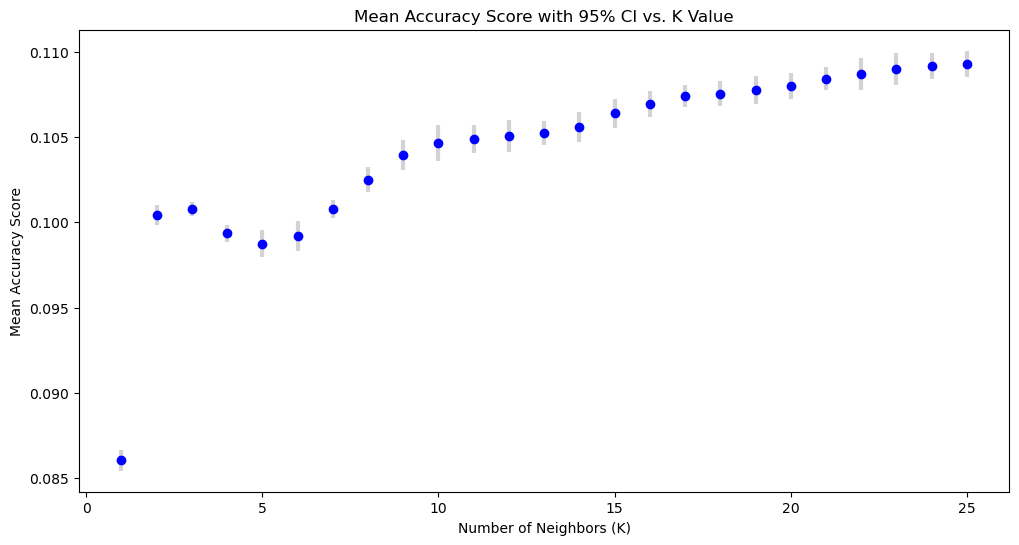

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

mean_accuracy_scores = []
std_accuracy_scores = []

k_range = range(1, 26)

# Asumiendo que data_estandar y data ya están definidos y son DataFrames de Pandas
X = data_estandar.iloc[:, :-1].values
y = data['noshow']

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Aplicar validación cruzada k-fold con todos los núcleos de la CPU
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy', n_jobs=-1)  # cv = número de folds
    mean_accuracy_scores.append(scores.mean())
    std_accuracy_scores.append(scores.std())
    print("K = " + str(k) + ", Score promedio: " + str(scores.mean()) + ", Desviación estándar: " + str(scores.std()))

plt.figure(figsize=(12, 6))
plt.errorbar(k_range, mean_accuracy_scores, yerr=std_accuracy_scores, fmt='o', color='blue',
             ecolor='lightgray', elinewidth=3, capsize=0)
plt.title('Mean Accuracy Score with 95% CI vs. K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Accuracy Score')
plt.show()